In [1]:
import numpy as np
from EM import EM
from plot import plot
import matplotlib.pyplot as plt

In [2]:
signal_name = 'creatinine'

treatment_names = {}
treatment_names['dialysis'] = ['dialysis'] 
treatment_names['nephrotoxic_drugs'] = ['acetaminophen_dose','celecoxib_dose','diclofenac_dose','ibuprofen_dose','indomethacin_dose',
'ketorolac_dose','meloxicam_dose','naproxen_dose', 'aminoglycoside', 'radiographic']
treatment_names['interference_drugs'] = ['dronedarone_dose', 'trimethoprim_dose']
treatment_names['diuretic'] = ['eplerenone_dose', 'amiloride_dose', 'hydrochlorothiazide_dose',
'spironolactone_dose', 'triamterene_dose', 'chlorothiazide_dose', 'indapamide_dose', 'torsemide_dose', 
'acetazolamide_dose', 'mannitol_dose']
treatment_names['ace_i'] = ['lisinopril_dose',
 'ramipril_dose',
 'benazepril_dose',
 'enalaprilat_dose',
 'captopril_dose',
 'perindopril_dose',
 'trandolapril_dose']
treatment_names['arb'] = ['valsartan_dose',
 'telmisartan_dose',
 'irbesartan_dose',
 'losartan_dose',
 'candesartan_dose']

#treatment_names['search'] = ['losartan', 'irbesartan', 'telmisartan', 'candesartan', 'valsartan']

chronic_keywords = ['chronic_kidney', 'kidney_cancer', 'sickle_cell', 'renal', 'esrd', 'diabetes', 'heart_failure']

demographic_names = ['age', 'gender', 'admit_weight']

In [3]:
# EM Setting
num_past_effects = 4
training_pct = .8
single_effect = False

In [4]:
data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')

In [5]:
%%time
em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect)
em.run_EM(5000)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
49 iterations before params converge
CPU times: user 5min 44s, sys: 40 ms, total: 5min 44s
Wall time: 5min 44s


In [6]:
em.get_MSE()

0.29645243625217527

In [7]:
for i, treatment in enumerate(treatment_names.keys()):
    print('Coefficient for {}: {}'.format(treatment, em.A[:, i]))
static_types = chronic_keywords + demographic_names
for j, static in enumerate(static_types):
    print('Coefficient for {}: {}'.format(static, em.b[j]))
print('initial state variance: {}'.format(em.sigma_0))
print('transition noise: {}'.format(em.sigma_1))
print('observation noise: {}'.format(em.sigma_2))

Coefficient for dialysis: [-1.25244691 -0.91004053 -0.21459075 -0.42475535]
Coefficient for nephrotoxic_drugs: [-0.08090726 -0.07991469 -0.0475412  -0.05704326]
Coefficient for interference_drugs: [-0.51968216  0.55852061 -0.5975565   0.45760547]
Coefficient for diuretic: [-0.03709144 -0.0906244  -0.00982771  0.00633813]
Coefficient for ace_i: [-0.1398929  -0.07606301  0.00553438 -0.05486874]
Coefficient for arb: [ 0.04790997  0.05916514  0.04554519 -0.02649363]
Coefficient for chronic_kidney: 1.3276992153677334
Coefficient for kidney_cancer: 0.4657241447060389
Coefficient for sickle_cell: 0.6944110901583288
Coefficient for renal: 0.36938015275431246
Coefficient for esrd: 4.979872491291173
Coefficient for diabetes: -0.011392474077059327
Coefficient for heart_failure: -0.10725797416111006
Coefficient for age: -0.010595353250786524
Coefficient for gender: 0.33801674162950984
Coefficient for admit_weight: -0.00391452359659601
initial state variance: 0.002450611017498509
transition noise: 

* Seems right
    * dialysis: large decrease, decreasing effect
    * interference drug: decrease, then reversible increase, as much as .4-.5
    * kidney condition, sickle cell, renal insufficiency all positive
    * esrd: large positive (too large?)
    * gender: if 1 is male, more muscle mass, should be positive
* Seems wrong
    * nephrotoxic: small but all negative, should be positive
    * diabete, heart failure: not clear effect, but could have interaction with drugs and be positive
    * diuiretic, ace_i, arb: smaller effects, hard to distinguish, since they possibly interact, but should be positive
* Other things to note
    * MSE might not be very informative since many series are flat in the predicted interval (no treatment given), so coefficients might be better way to measure performance
    * Does std of signal values of patients with no treatment approximate transition noise? 
    * Noises present similar issues as before
        * larger observational noise

Coefficient for dialysis: [-1.25244691 -0.91004053 -0.21459075 -0.42475535]
Coefficient for nephrotoxic_drugs: [-0.08090726 -0.07991469 -0.0475412  -0.05704326]
Coefficient for interference_drugs: [-0.51968216  0.55852061 -0.5975565   0.45760547]
Coefficient for diuretic: [-0.03709144 -0.0906244  -0.00982771  0.00633813]
Coefficient for ace_i: [-0.1398929  -0.07606301  0.00553438 -0.05486874]
Coefficient for arb: [ 0.04790997  0.05916514  0.04554519 -0.02649363]
Coefficient for chronic_kidney: 1.3276992153677334
Coefficient for kidney_cancer: 0.4657241447060389
Coefficient for sickle_cell: 0.6944110901583288
Coefficient for renal: 0.36938015275431246
Coefficient for esrd: 4.979872491291173
Coefficient for diabetes: -0.011392474077059327
Coefficient for heart_failure: -0.10725797416111006
Coefficient for age: -0.010595353250786524
Coefficient for gender: 0.33801674162950984
Coefficient for admit_weight: -0.00391452359659601
initial state variance: 0.002450611017498509
transition noise: 0.3092411529988513
observation noise: 1.1462685855189954

In [ ]:
good_examples=[771, 776, ]

Patient 263


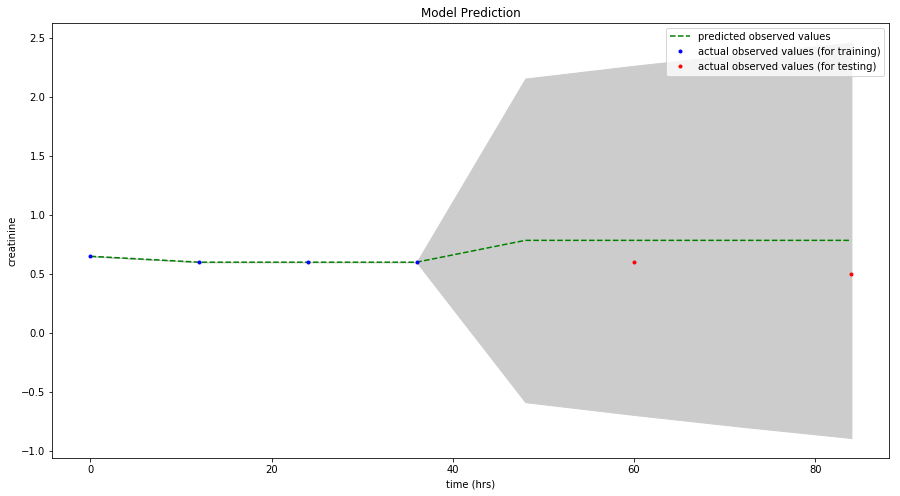

Patient 322


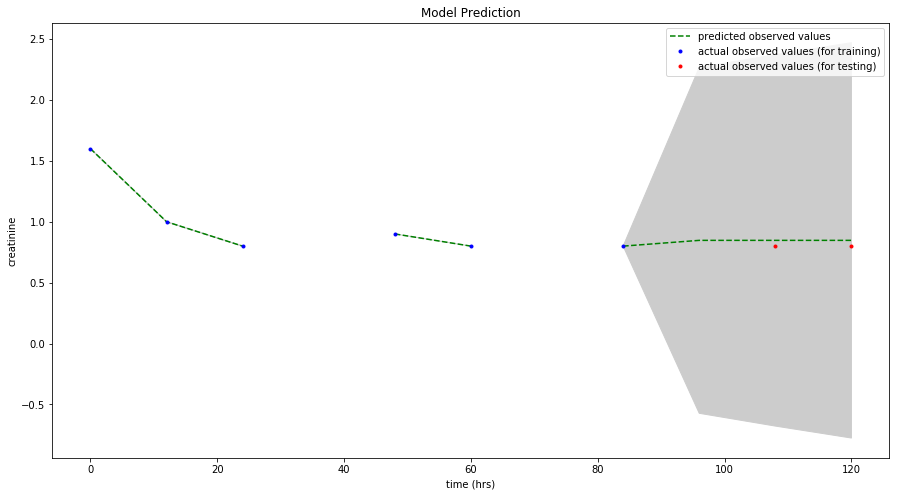

Patient 1769


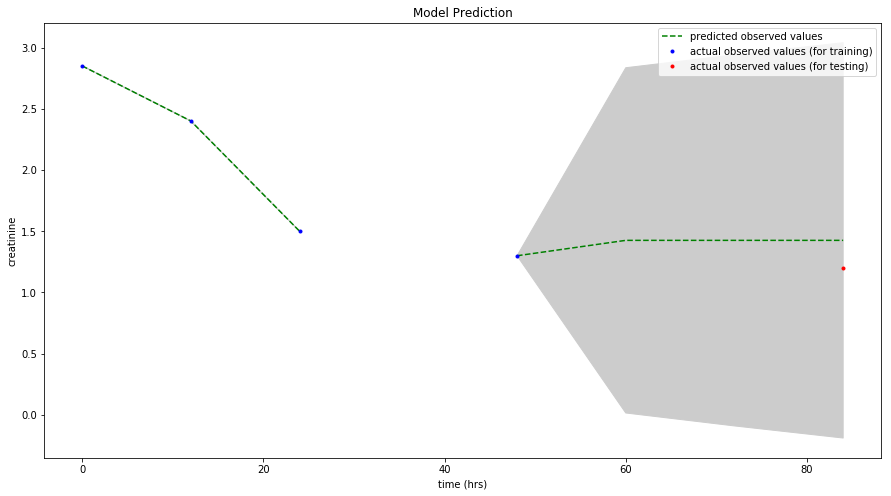

Patient 2119


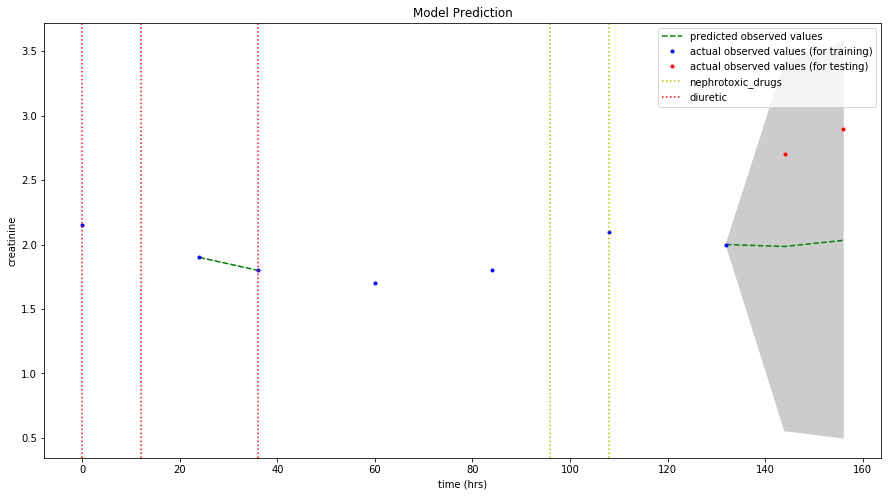

Patient 440


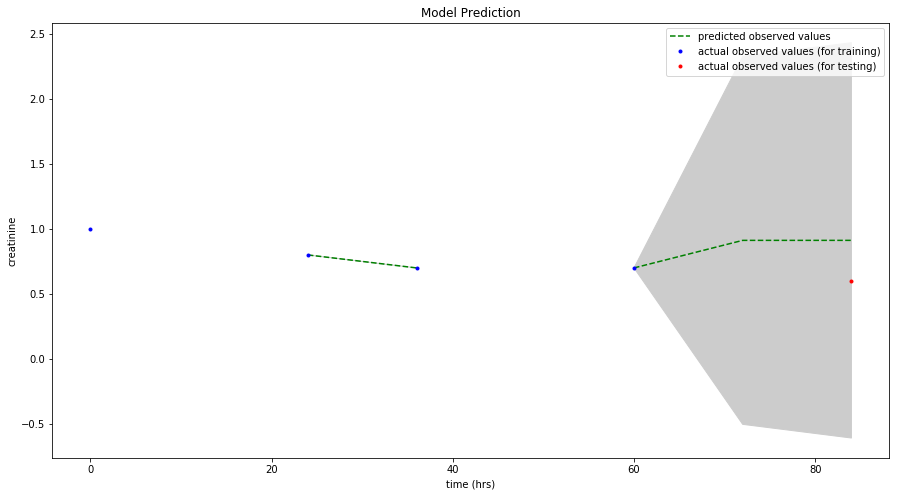

Patient 1542


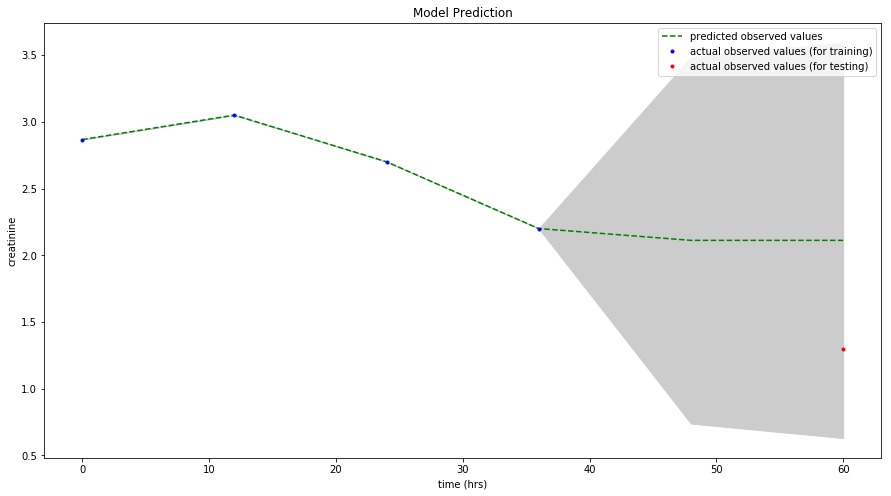

Patient 1966


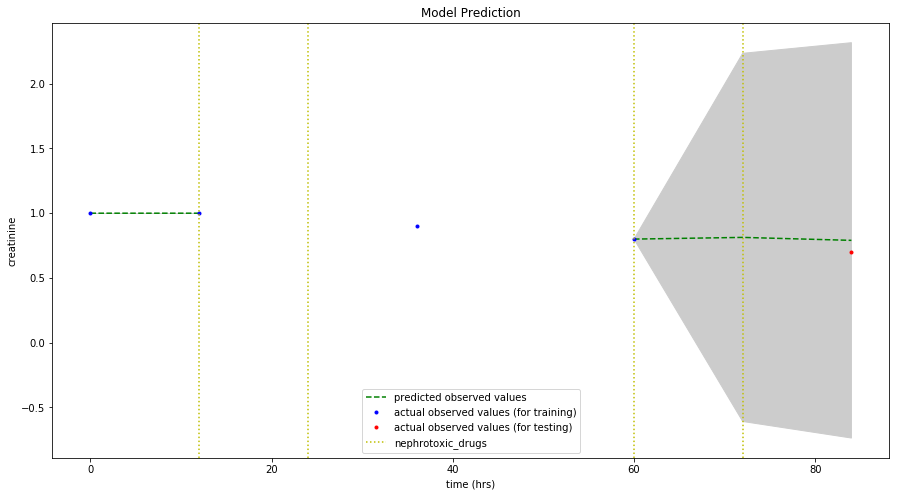

Patient 265


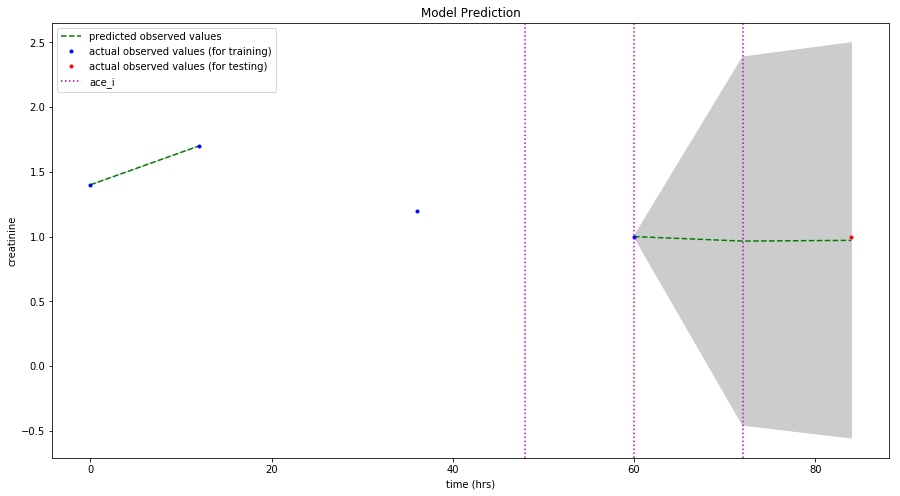

Patient 1591


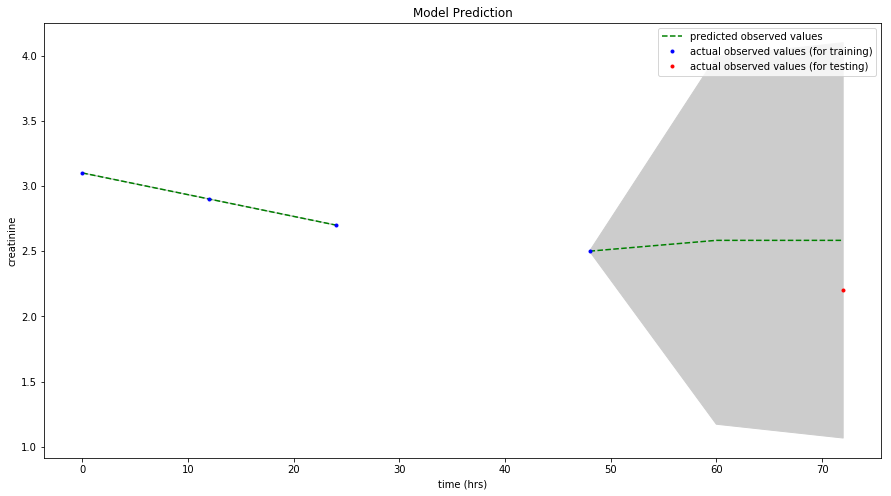

Patient 114


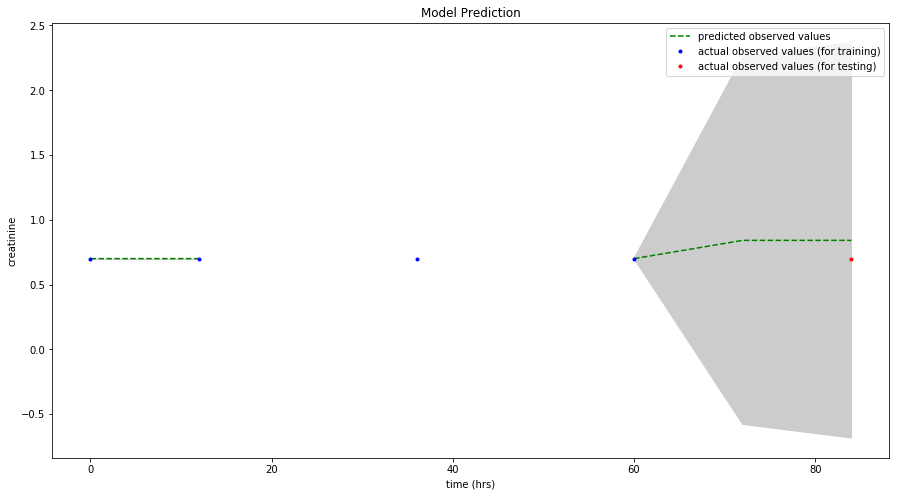

Patient 1239


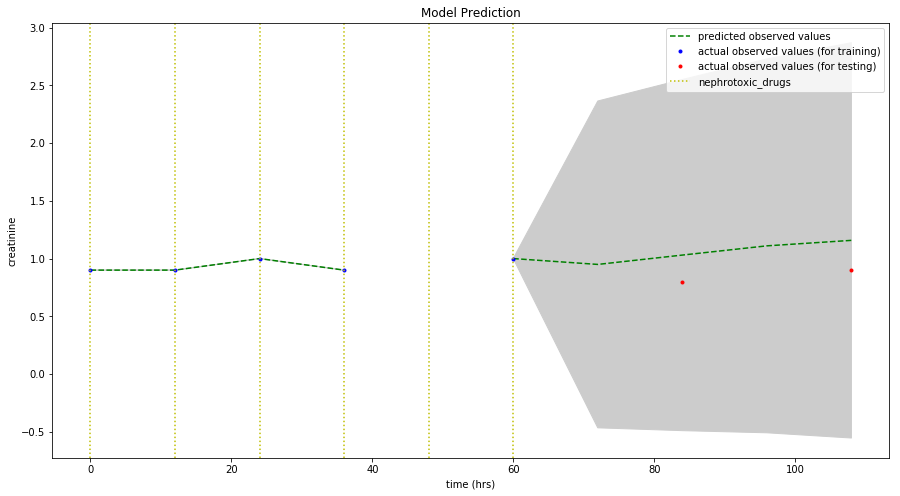

Patient 1026


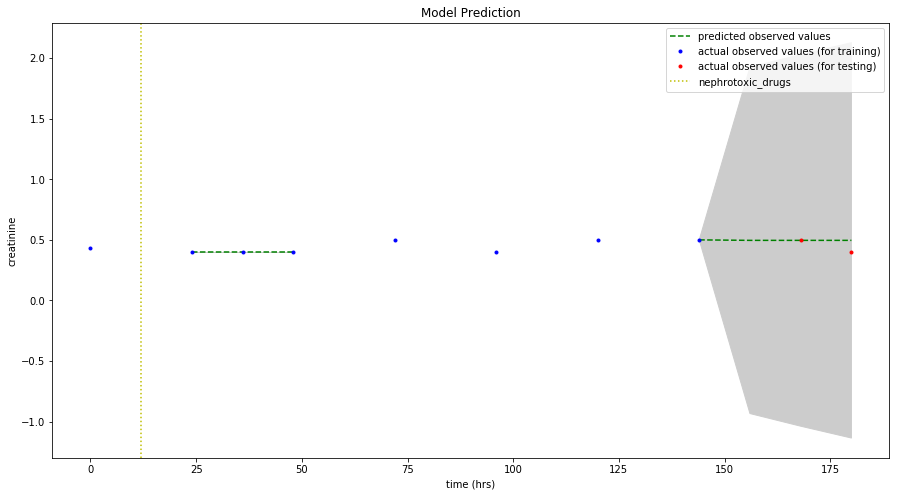

Patient 719


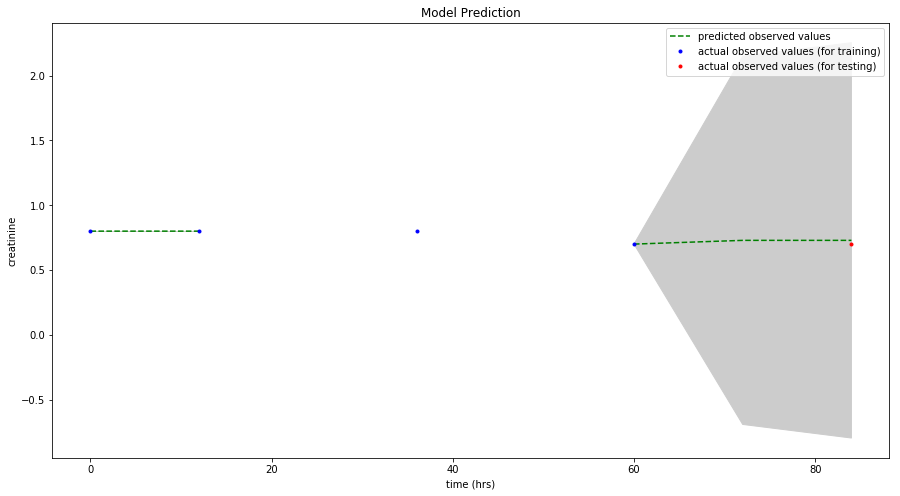

Patient 117


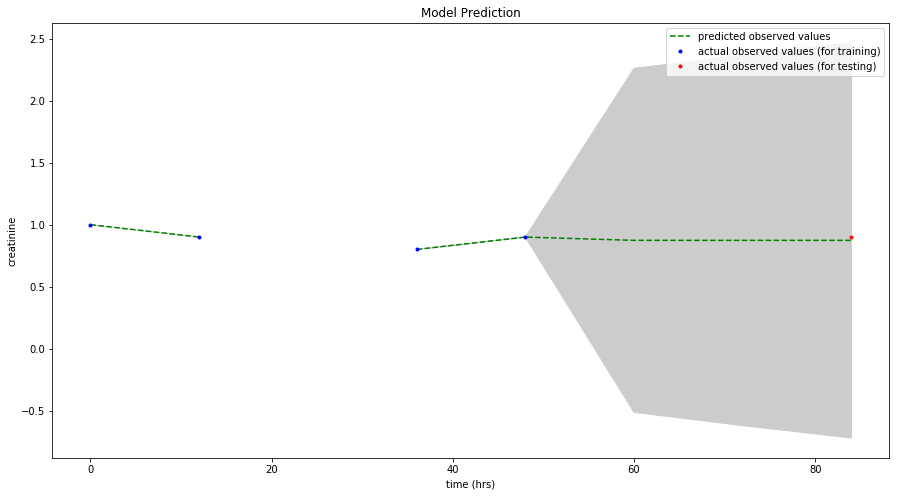

Patient 2360


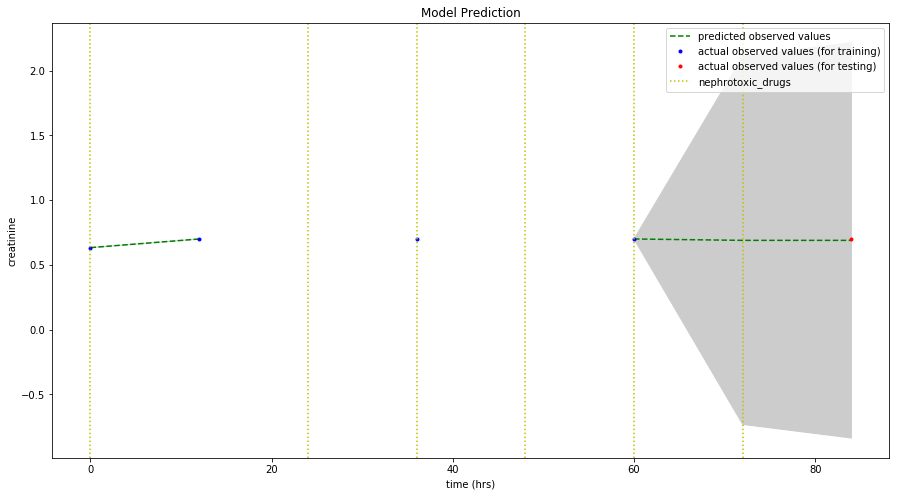

Patient 95


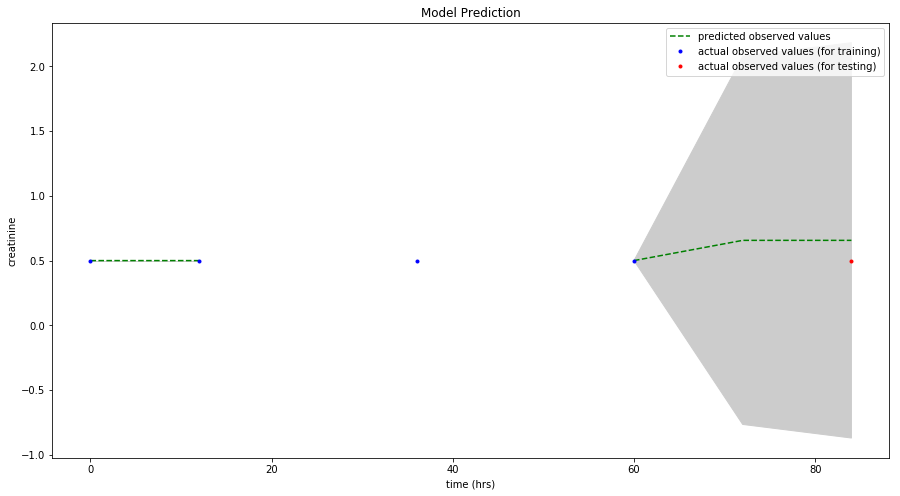

Patient 2339


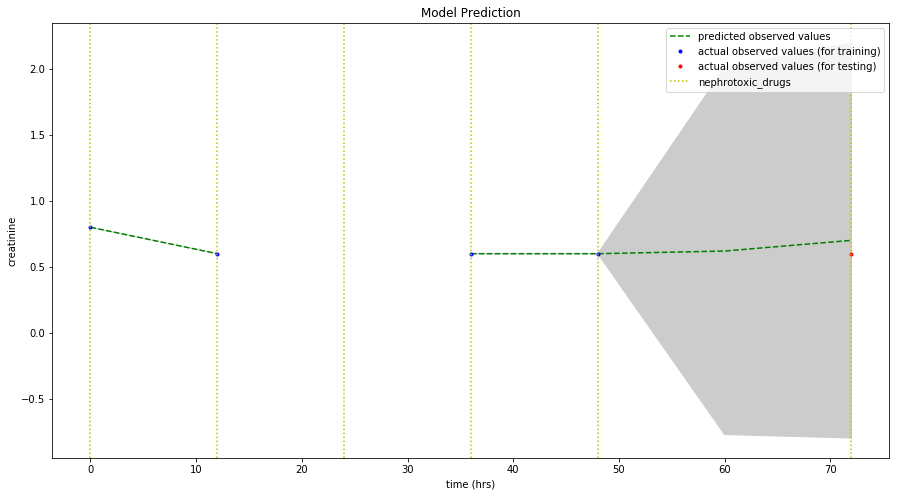

Patient 91


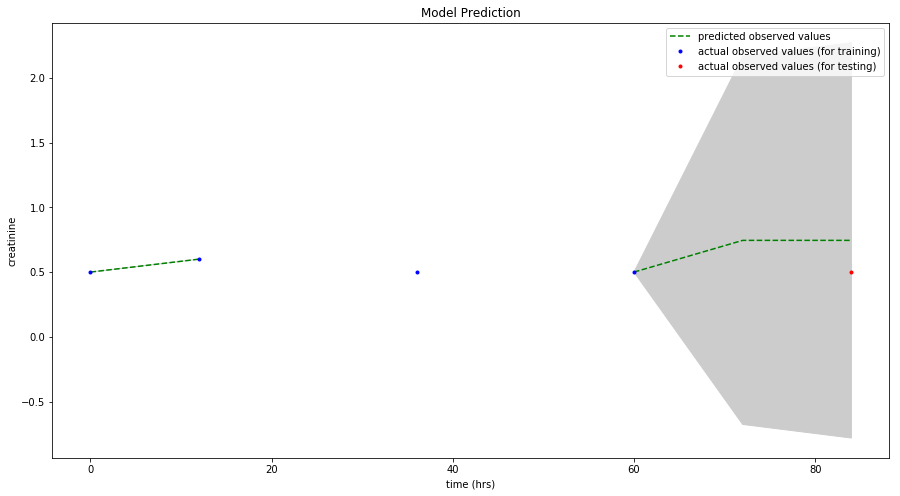

Patient 742


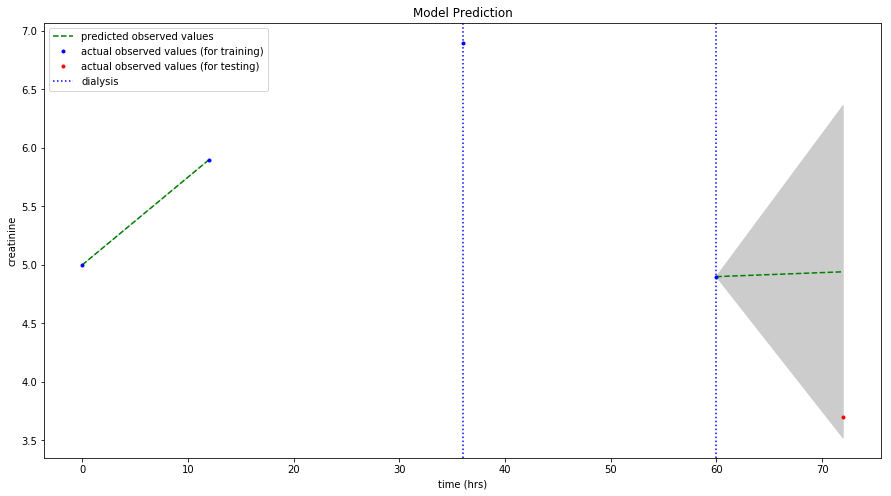

Patient 959


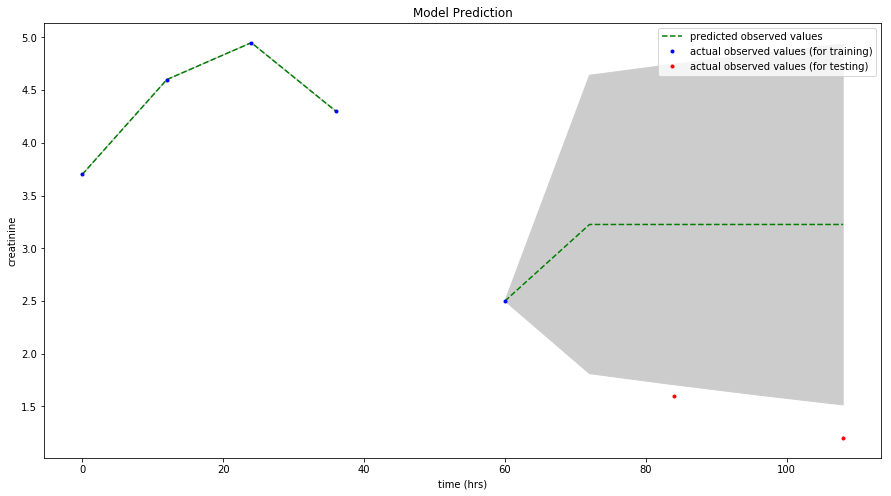

Patient 254


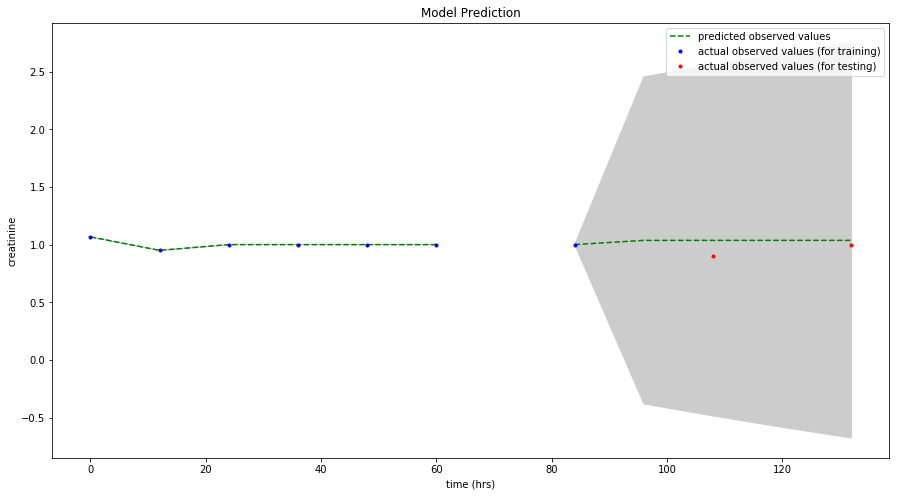

Patient 1329


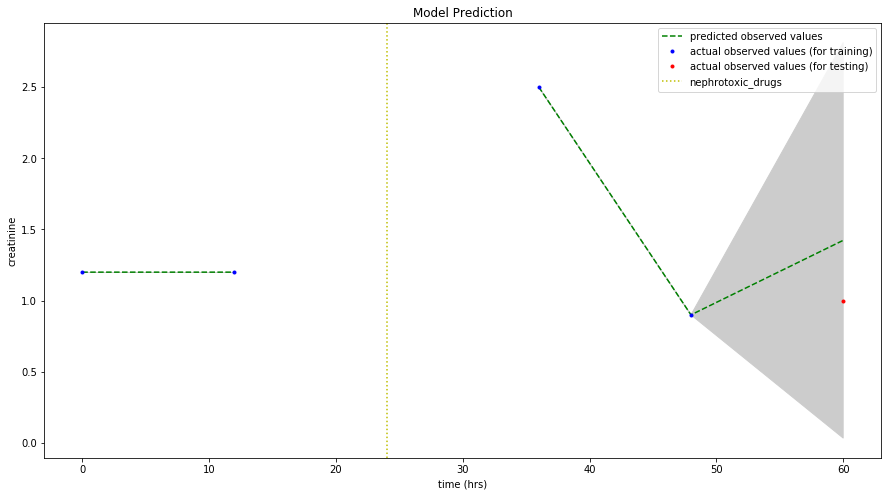

Patient 1223


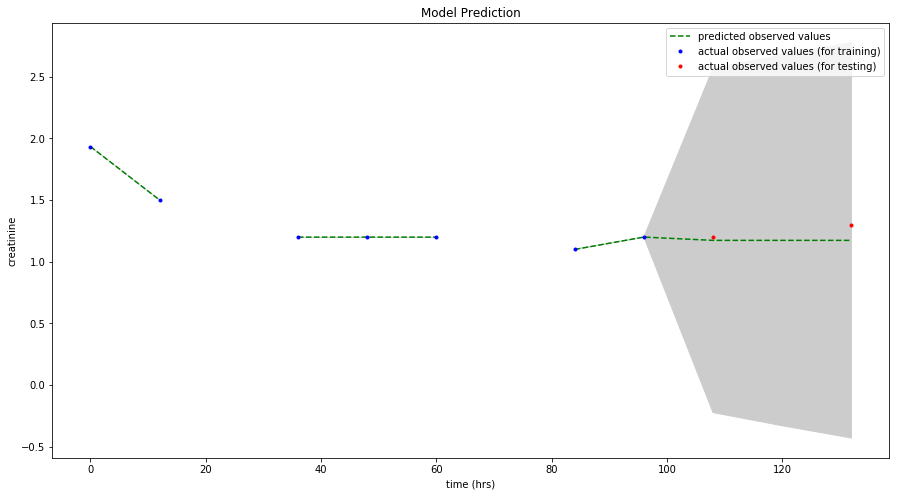

Patient 2073


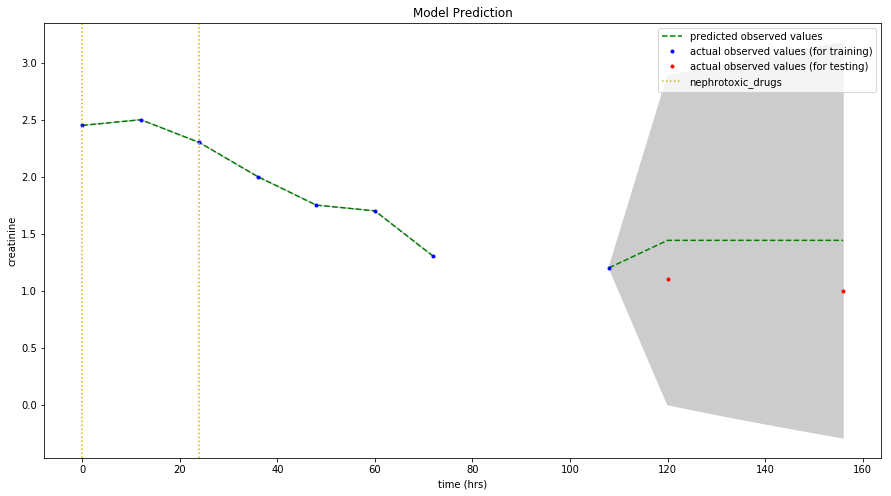

Patient 1878


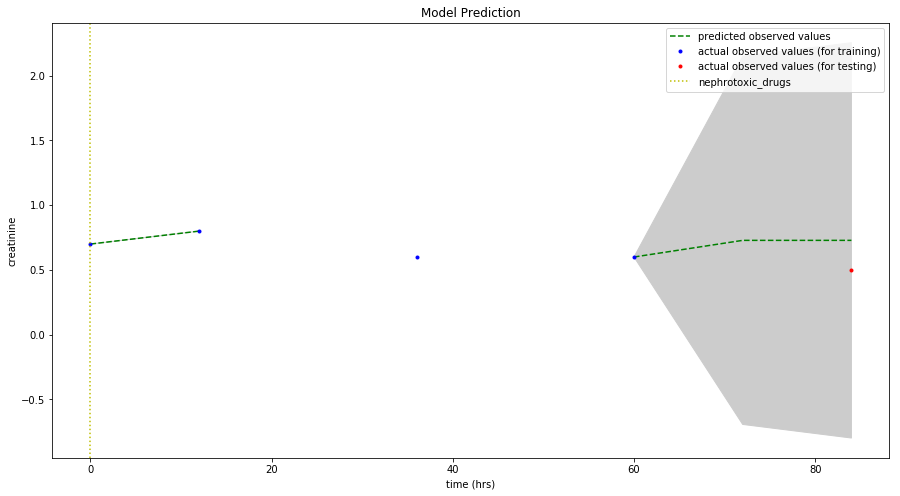

Patient 329


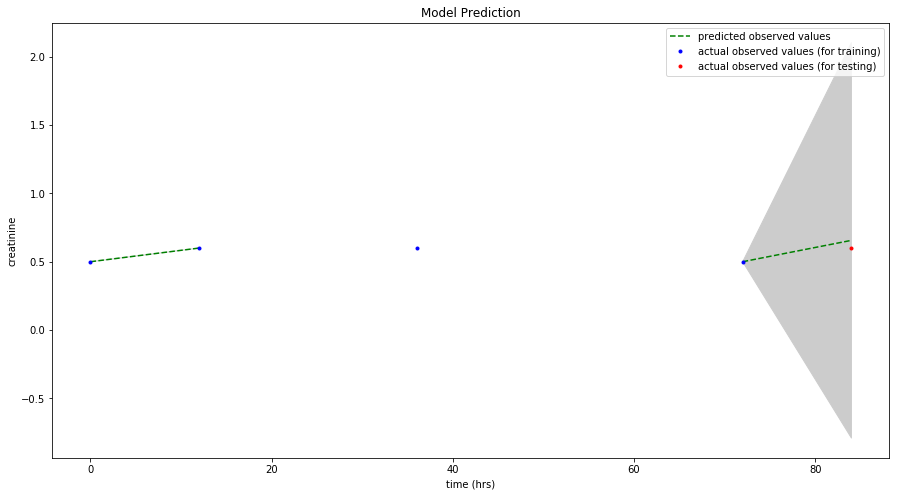

Patient 834


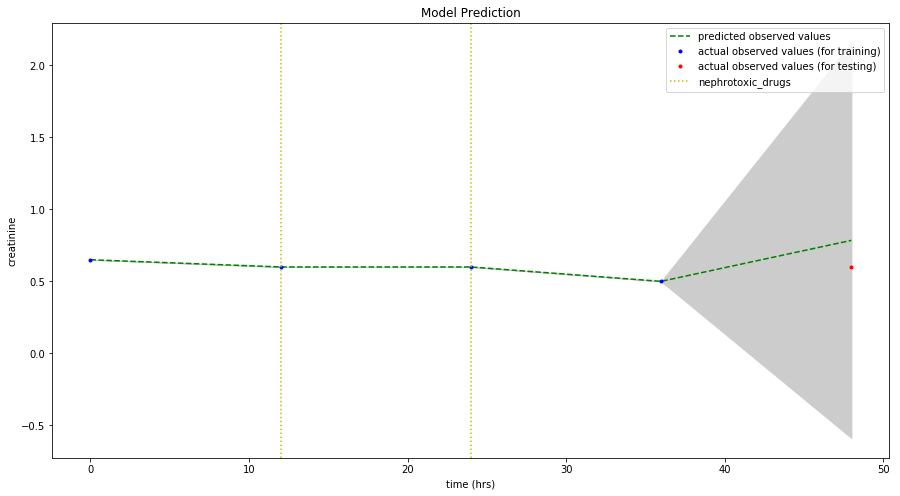

Patient 1668


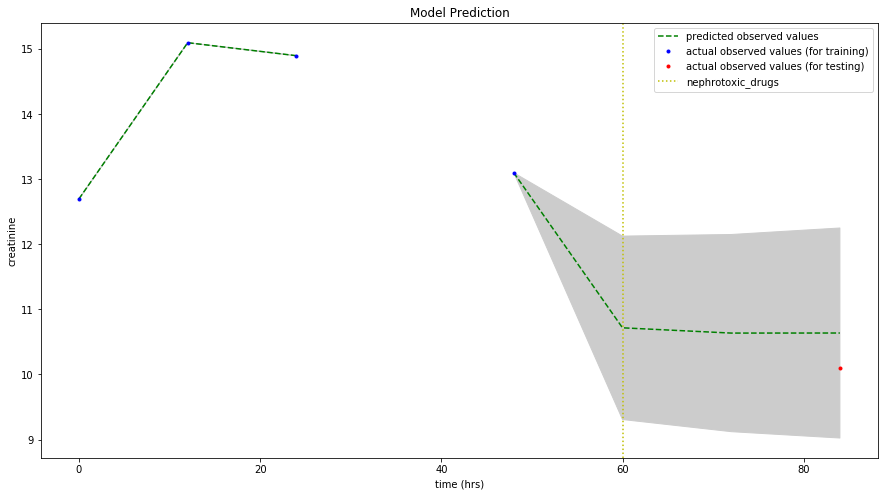

Patient 2143


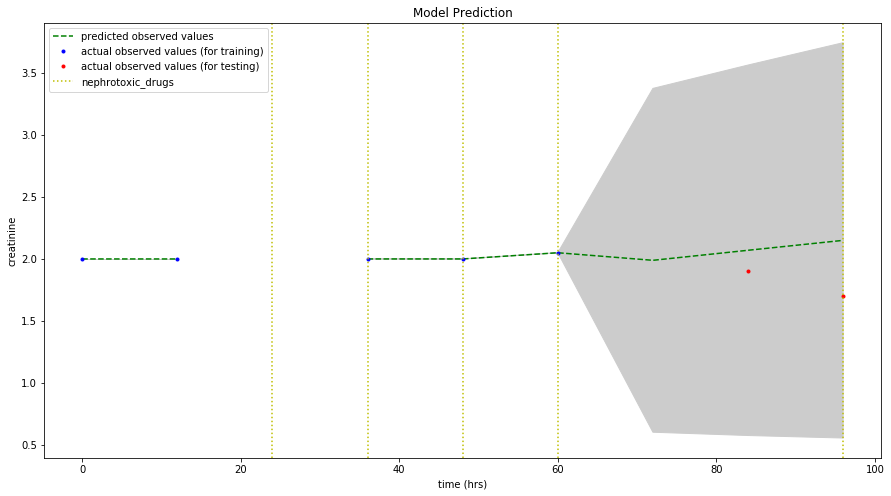

Patient 1317


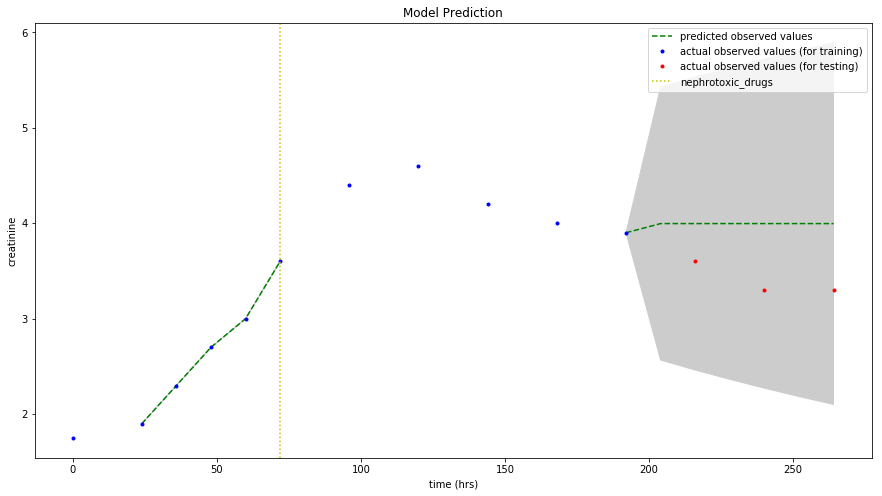

Patient 191


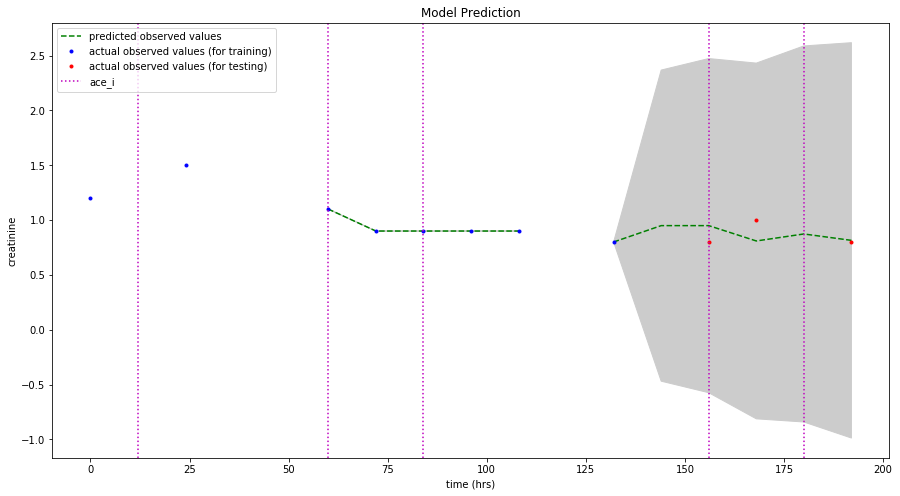

Patient 1173


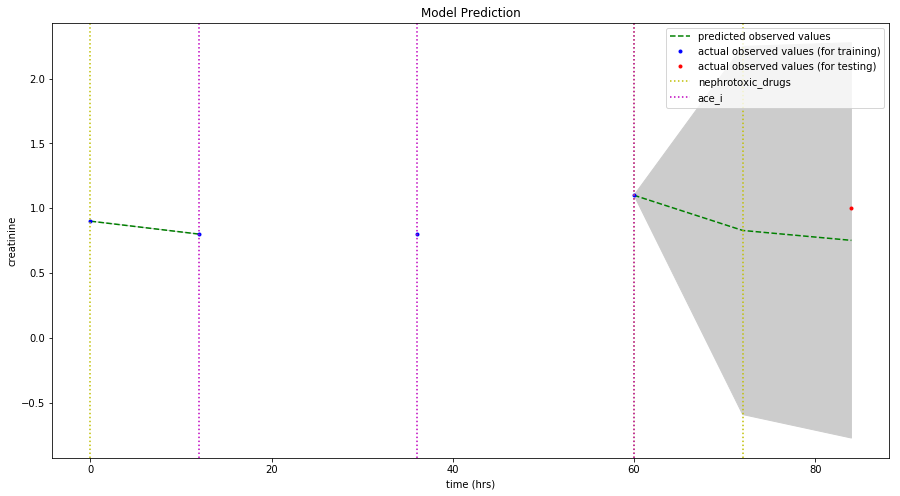

Patient 1710


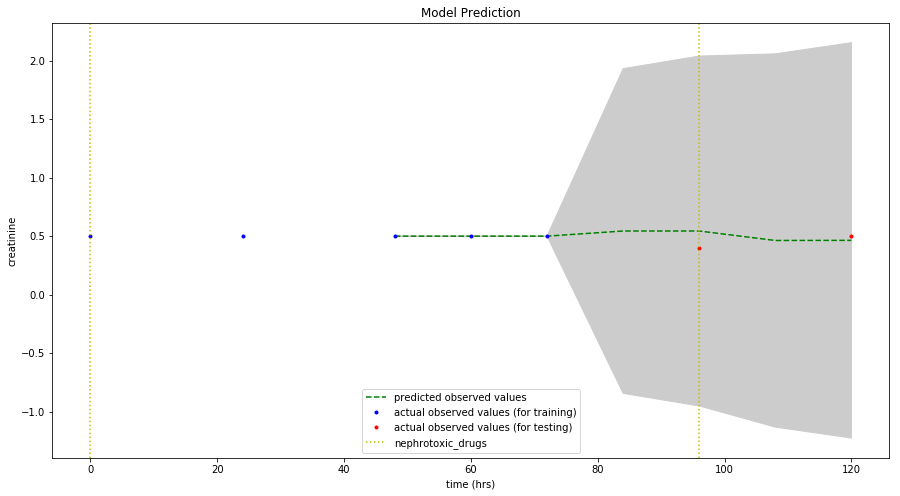

Patient 1053


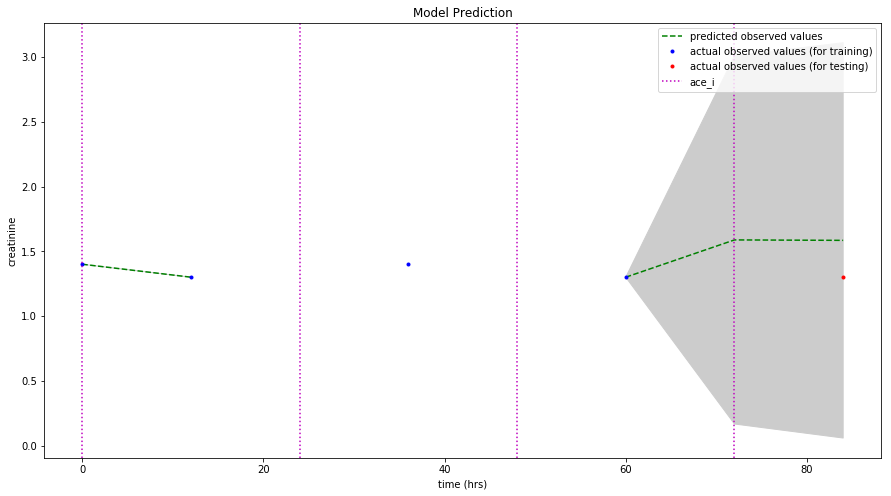

Patient 1668


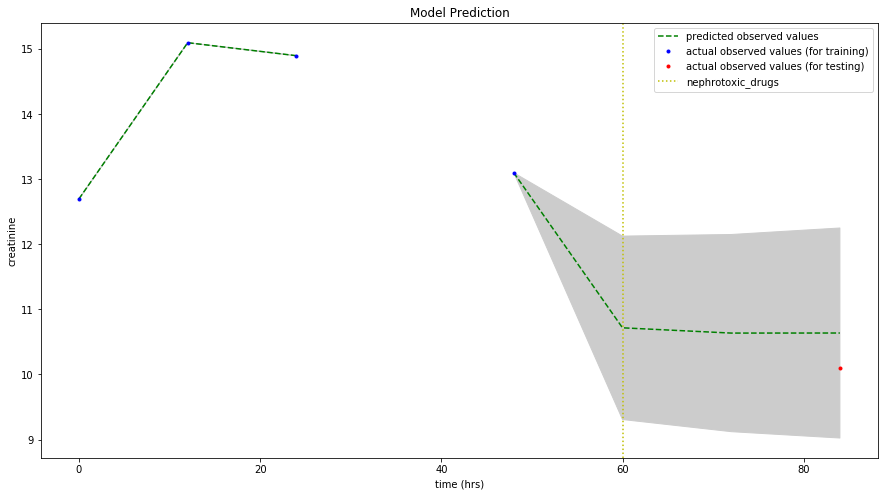

Patient 1866


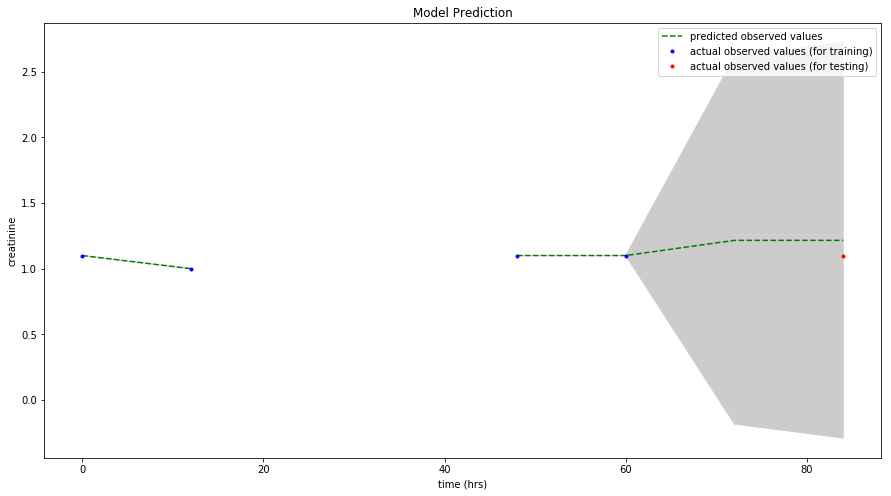

Patient 419


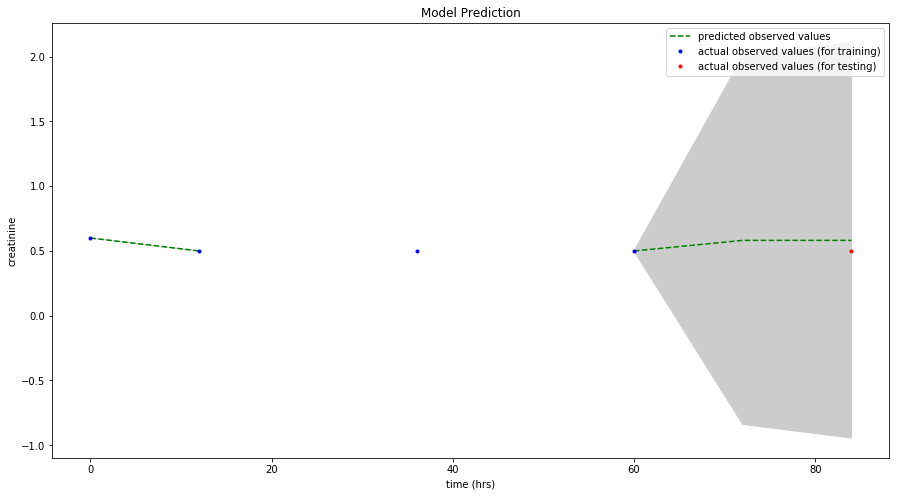

Patient 142


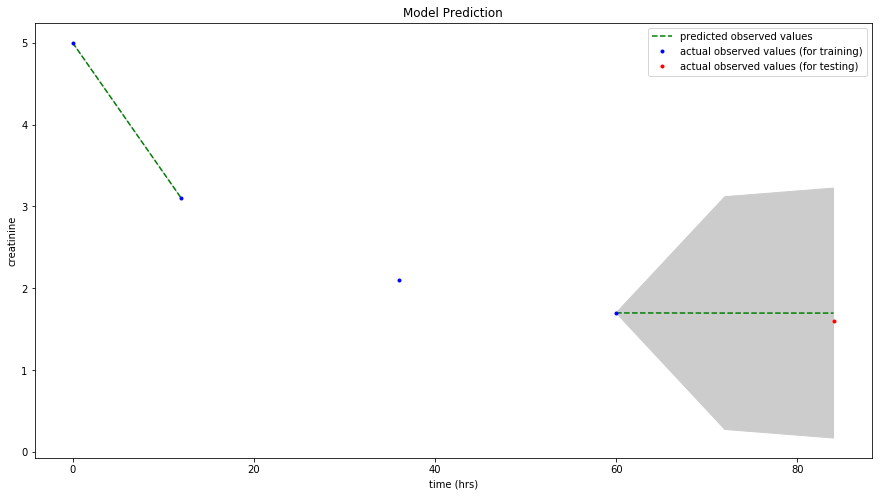

Patient 462


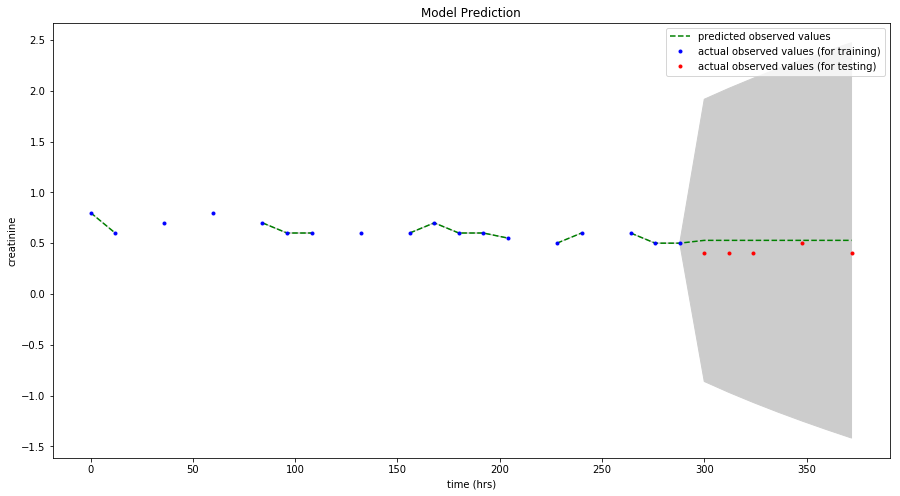

Patient 683


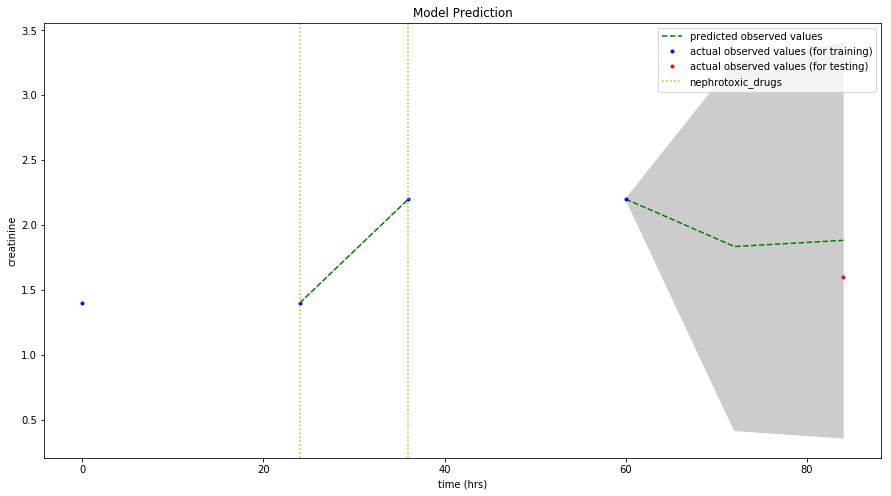

Patient 995


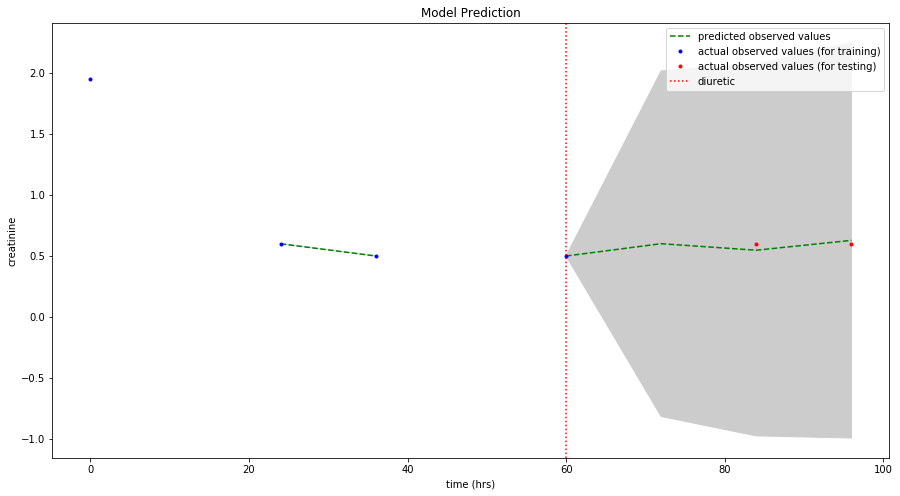

Patient 2179


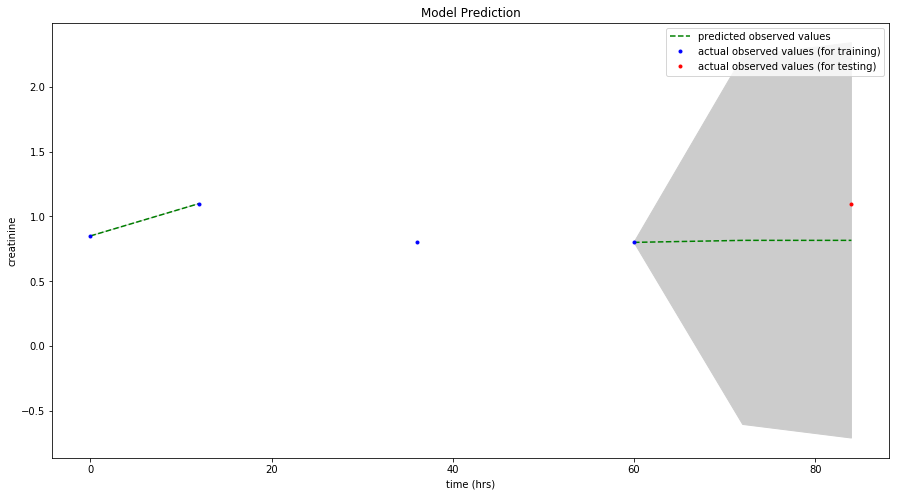

Patient 1129


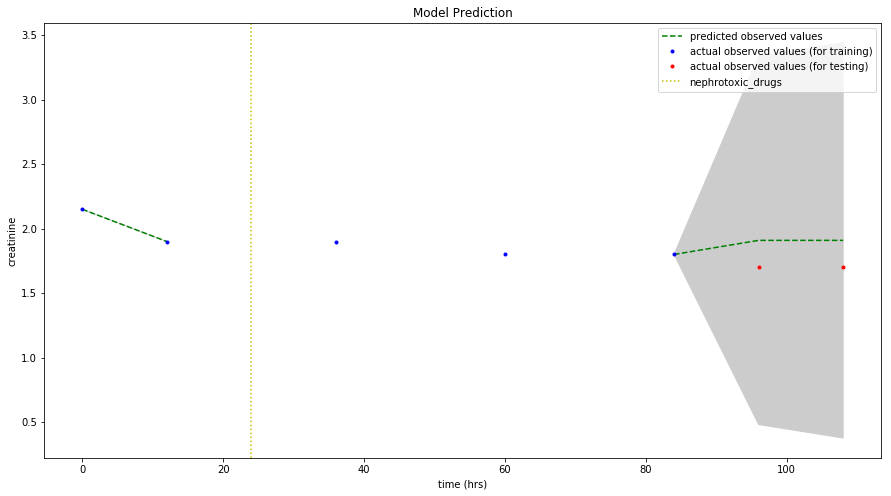

Patient 2433


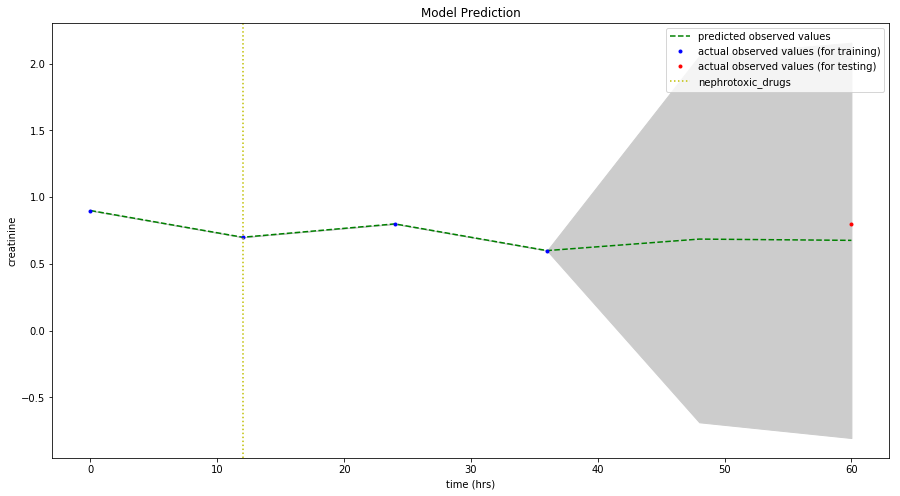

Patient 1901


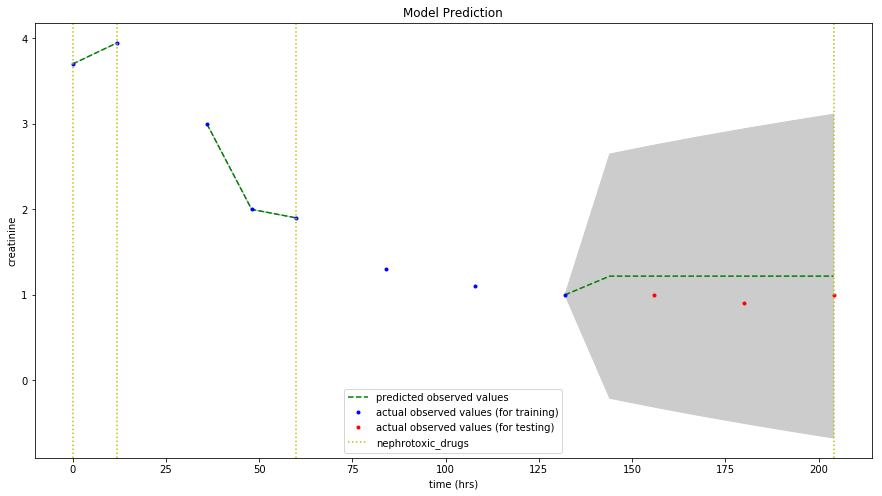

Patient 1782


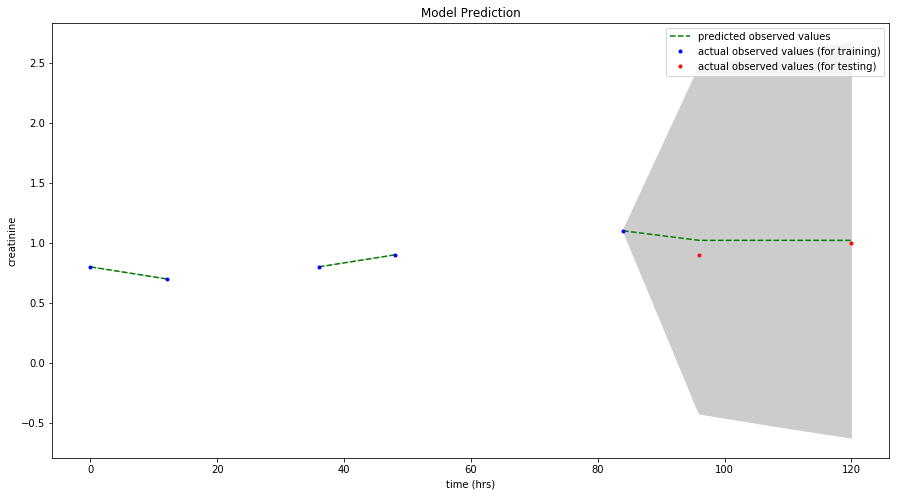

Patient 705


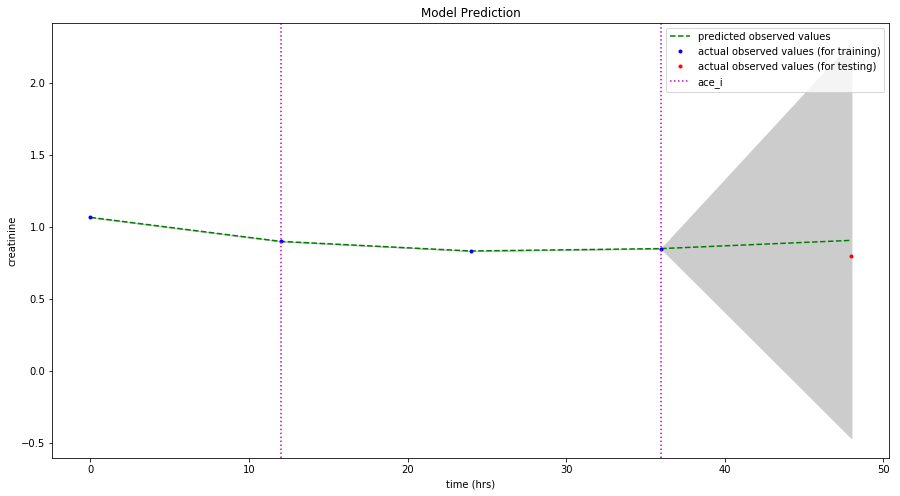

Patient 495


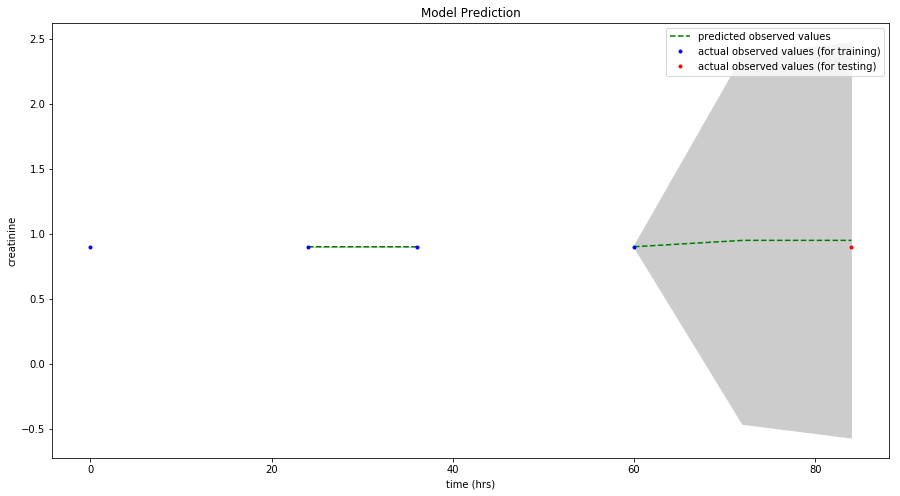

Patient 1361


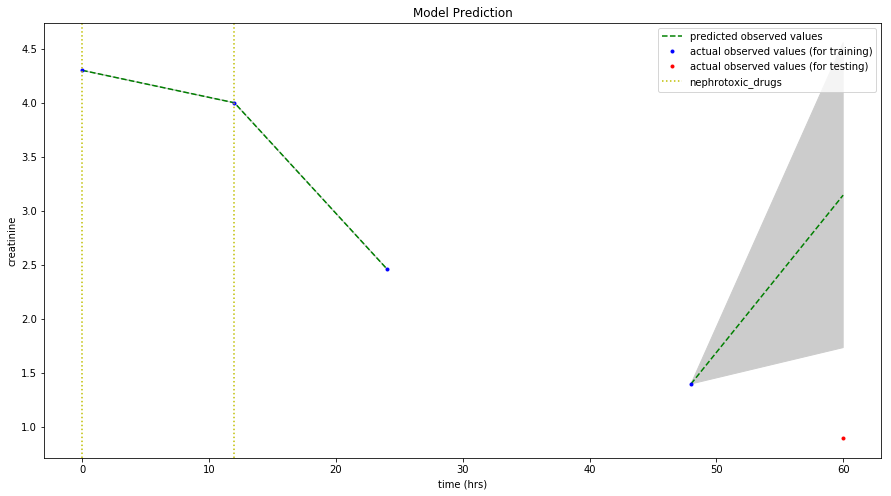

Patient 1877


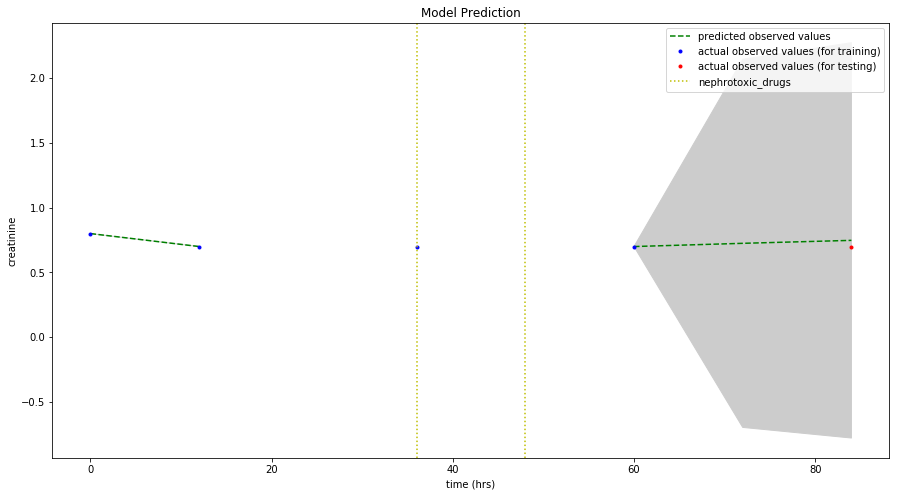

In [13]:
random_patients = np.random.randint(0, em.y.shape[0], 50)
for i in random_patients:
    plot(em, i, 12, signal_name, treatment_types=list(treatment_names.keys()))

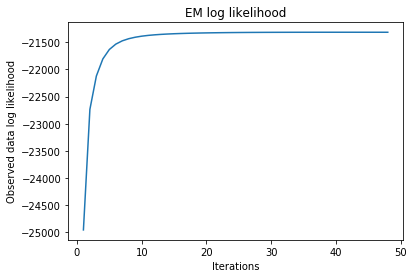

In [10]:
plt.plot([i for i in range(1, len(em.obs_log_lik))], em.obs_log_lik[1:])
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('EM log likelihood')
plt.show()

### Analysis
Changes
* Only select patients with at least 4 training observations (total of 1821)

On real data
* Issues:
    * treatments coefficients are negative while they should be positive
        * changing initialization doesn't seem to help as model converges in bad local min, and most directions still don't change
    * observation noise is bigger than transition noise
    * run time is long, each iteration takes 4s, M step takes 2.5s, loglik takes 1s
* Reasons:
    * The increasing effects of treatments are not pronouced in the data (see Source Data Analysis)
        * it makes sense that nsaid and aspirin shows small number close to zero since their effects are 50-50.
        * transfusion platelet should be more negative than others, also makes sense.
        * the first number for plasma is a very negative number, but should be close to zero
        * anticoagulant are more negative than platelet, but should be more similar
    * bad noise estimation is expected, specifically underestimated initial state variance and overestimated observational noise 
    
On simulation
* Issues
    * b seems to be harder to identify correctly compared to A (sensitive to initialization)
    * estimated sigma 0 and sigma 2 are very different from the true value (not sensitive to initialization)
        * underestimate sigma 0, overestimate sigma 2
* Reasons
   

2000 iterations (haven't converged, 2nd decimal place different) took 2hrs
Coefficient for nsaid: [-0.05332823  0.01914507 -0.03836663]
Coefficient for transfusion_plasma: [-0.694217   -0.03495779 -0.0522998 ]
Coefficient for transfusion_platelet: [-0.38430565 -0.15892385 -0.31262086]
Coefficient for anticoagulant: [-0.63994745 -0.74545805 -0.5791365 ]
Coefficient for aspirin: [-0.06409683 -0.06972851  0.0302996 ]
Coefficient for chronic kidney failure: -0.2643214568560729
Coefficient for sickle cell: -0.5218307359528491
Coefficient for age: -0.027047728916270067
initial state variance: 0.00020395166620667873
transition noise: 0.14622894241670079
observation noise: 1.127059127544025